In [2]:

from fixedpointfinder.FixedPointFinder import Adamfixedpointfinder
from fixedpointfinder.three_bit_flip_flop import Flipflopper
from fixedpointfinder.plot_utils import plot_fixed_points, plot_velocities, visualize_flipflop
import autograd.numpy as np
import os
import tensorflow as tf

## Create and train recurrent model on 3-Bit FlipFop task

specify architecture e.g. 'vanilla' and number of hidden units

In [3]:
rnn_type = 'gru'
n_hidden = 24

flopper = Flipflopper(rnn_type=rnn_type, n_hidden=n_hidden)
stim = flopper.generate_flipflop_trials()

train or load a model

Loaded gru model.


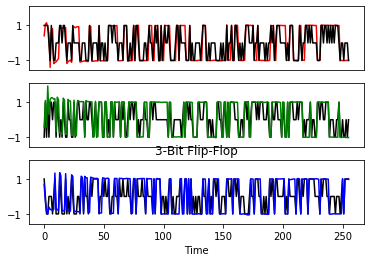

In [4]:
try:
    flopper.load_model()
except:
    flopper.train(stim, 2000, save_model=True)

prediction = flopper.model.predict(tf.convert_to_tensor(stim['inputs'], dtype=tf.float32))
visualize_flipflop(prediction, stim)

## Apply FixedPointFinder

Get weights of recurrent layer.
Produce activations to sample from.
Employ FixedPointFinder

-----------------------------------------
Architecture to analyse : gru
The layer has 24 recurrent units. 
-----------------------------------------
HyperParameters: 
threshold - 1e-12
 unique_tolerance - 0.001
-----------------------------------------

HyperParameters for adam: 
 learning rate - 0.01
 maximum iterations - 5000
print every 200 iterations
performing joint optimization
-----------------------------------------

Function value: 0.2433368862112387 ; lr: 0.01 ; agnc 1.0 ; norm 0.007560771740593775
Function value: 0.002372945613983108 ; lr: 0.0098 ; agnc 0.8333333333333334 ; norm 0.0004307002578953337
Function value: 0.00030960647031639664 ; lr: 0.0096 ; agnc 0.7142857142857143 ; norm 6.750995415738768e-05
Function value: 0.00014242164812982544 ; lr: 0.0094 ; agnc 0.625 ; norm 2.0033216813131226e-05
Function value: 9.034643859296196e-05 ; lr: 0.0093 ; agnc 0.5555555555555556 ; norm 1.086645712115057e-05
Function value: 6.296978656465374e-05 ; lr: 0.0091 ; agnc 0.5 ; norm 7.5

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x158394a90>)

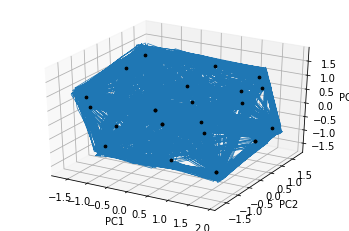

In [5]:
weights = flopper.model.get_layer(flopper.hps['rnn_type']).get_weights()
activations = flopper.get_activations(stim)

fpf = Adamfixedpointfinder(weights, rnn_type,
                           q_threshold=1e-12,
                           epsilon=0.01,
                           alr_decayr=0.0001,
                           max_iters=5000)

states = fpf.sample_states(activations, 1000, 0.5)
inputs = np.zeros((states.shape[0], 3))

fps = fpf.find_fixed_points(states, inputs)

plot_fixed_points(activations, fps, 3000, 1)
